In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3.5 모델 학습

In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print('\ntrain data:', x_train.shape, y_train.shape)
print('test data:',x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step

train data: (60000, 28, 28) (60000,)
test data: (10000, 28, 28) (10000,)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax')
])

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3.5.1 모델 학습

In [4]:
model.fit(x=x_train, y=y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.3747 - accuracy: 0.8908


In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9507
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1340 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1148 - accuracy: 0.9651
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1013 - accuracy: 0.9693
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0905 - accuracy: 0.9723


In [6]:
model.fit(x_train, y_train, epochs=2, batch_size=32)

print('train data:', x_train.shape, y_train.shape)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9739
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9764
train data: (60000, 28, 28) (60000,)


In [7]:
model.fit(x_train, y_train, epochs=2, batch_size=64)

Epoch 1/2
938/938 [==============================] - 3s 3ms/step - loss: 0.0596 - accuracy: 0.9818
Epoch 2/2
938/938 [==============================] - 2s 2ms/step - loss: 0.0566 - accuracy: 0.9825


In [8]:
history = model.fit(x_train, y_train, epochs=2, batch_size=64)

print( history.history )

Epoch 1/2
938/938 [==============================] - 2s 3ms/step - loss: 0.0550 - accuracy: 0.9831
Epoch 2/2
938/938 [==============================] - 2s 3ms/step - loss: 0.0530 - accuracy: 0.9831
{'loss': [0.05496712774038315, 0.053038906306028366], 'accuracy': [0.9831166863441467, 0.9831166863441467]}


Epoch 1/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0496 - accuracy: 0.9846
Epoch 2/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0471 - accuracy: 0.9850
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0444 - accuracy: 0.9861
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0416 - accuracy: 0.9872
Epoch 5/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0403 - accuracy: 0.9872
Epoch 6/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0379 - accuracy: 0.9878
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0347 - accuracy: 0.9893
Epoch 8/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 10/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0314 - accuracy: 0.9900

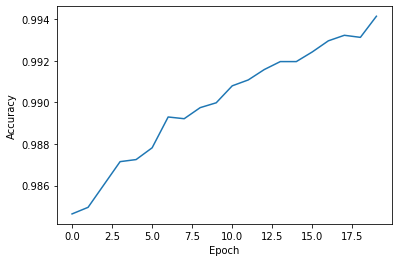

In [9]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=20, batch_size=64)
plt.plot( history.history['accuracy'] )

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 3.5.2 tf.data.Dataset의 학습

In [10]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.batch(32)

print( 'train_ds type :', type(train_ds) )

train_ds type : <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [11]:
model.fit(train_ds, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0368 - accuracy: 0.9877
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9907
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0260 - accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9926


In [12]:
import tensorflow as tf

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

print( 'test_ds type :', type(test_ds) )

test_ds type : <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [13]:
loss, accuracy = model.evaluate(test_ds)

print('accuracy:', accuracy)
print('loss:', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9653
accuracy: 0.9653000235557556
loss: 0.18304017186164856


## 3.5.3 유효성 검사 홀드아웃셋을 자동으로 분리하기


In [14]:
model.fit(x_train, y_train, validation_split=0.2, epochs=5)

print('train data : ', x_train.shape[0]*0.8)
print('validation date : ', x_train.shape[0]*0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0300 - accuracy: 0.9896 - val_loss: 0.0269 - val_accuracy: 0.9911
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0294 - val_accuracy: 0.9902
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0315 - val_accuracy: 0.9888
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0388 - val_accuracy: 0.9870
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0436 - val_accuracy: 0.9862
train data :  48000.0
validation date :  12000.0


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.2, 
                                                  random_state=0)

print (x_train.shape)
print (x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


In [16]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_val = x_train[-12000:]
y_val = y_train[-12000:]
x_train = x_train[:-12000]
y_train = y_train[:-12000]

print (x_train.shape)
print (x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


In [17]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.batch(32)

val_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_ds = val_ds.batch(32)

model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0259 - val_accuracy: 0.9909
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0265 - val_accuracy: 0.9909
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0210 - val_accuracy: 0.9927
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0161 - val_accuracy: 0.9949
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0264 - val_accuracy: 0.9909


## 3.5.4 다중 입력, 다중 출력 모델로 데이터 전달

In [18]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import concatenate

input_image = Input(shape=(784,), name='input_image')
x1 = Dense(units=32, activation='relu')(input_image)
x1 = Dense(units=16, activation='relu')(x1)

input_csv = Input(shape=(13,), name='input_csv')
x2 = Dense(units=16, activation='relu')(input_csv)
x2 = Dense(units=8, activation='relu')(x2)

x3 = concatenate([x1, x2])

outputA = Dense(8, name='outputA')(x3)
outputB = Dense(1, name='outputB')(x3)

model = Model(inputs=[input_image, input_csv], outputs=[outputA, outputB])

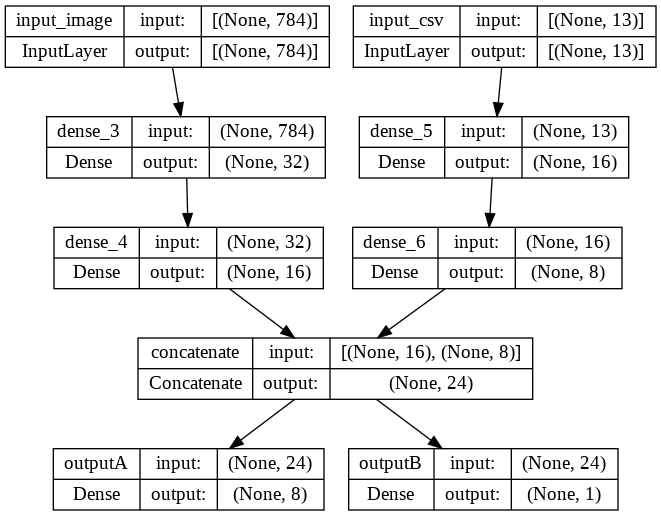

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [20]:
model.compile(
    optimizer='adam',
    loss={
        "outputA": 'categorical_crossentropy',
        "outputB": 'binary_crossentropy',
    }
)